## Financial Forecasting and Trend Analysis: A Time Series Approach Applied to Apple and Amazon Stock Prices

In [217]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

We are going to do time series analysis and forecasting for stock market.

In [218]:
apple_stocks = pd.read_csv('Apple.csv')
amazon_stocks= pd.read_csv('amazon.csv')

In [219]:
apple_stocks.head(10)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2000-01-03,4.017857,3.631696,3.745536,3.997768,133949200.0,2.665724
1,2000-01-04,3.950893,3.613839,3.866071,3.660714,128094400.0,2.440975
2,2000-01-05,3.948661,3.678571,3.705357,3.714286,194580400.0,2.476697
3,2000-01-06,3.821429,3.392857,3.790179,3.392857,191993200.0,2.262367
4,2000-01-07,3.607143,3.410714,3.446429,3.553571,115183600.0,2.369532
5,2000-01-10,3.651786,3.383929,3.642857,3.491071,126266000.0,2.327857
6,2000-01-11,3.549107,3.232143,3.426339,3.312500,110387200.0,2.208785
7,2000-01-12,3.410714,3.089286,3.392857,3.113839,244017200.0,2.076318
8,2000-01-13,3.526786,3.303571,3.374439,3.455357,258171200.0,2.304043
9,2000-01-14,3.651786,3.549107,3.571429,3.587054,97594000.0,2.391858


In [220]:
amazon_stocks.head(10)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2000-01-03,89.5625,79.046799,81.5000,89.3750,16117600,89.3750
1,2000-01-04,91.5000,81.750000,85.3750,81.9375,17487400,81.9375
2,2000-01-05,75.1250,68.000000,70.5000,69.7500,38457400,69.7500
3,2000-01-06,72.6875,64.000000,71.3125,65.5625,18752000,65.5625
4,2000-01-07,70.5000,66.187500,67.0000,69.5625,10505400,69.5625
5,2000-01-10,72.6250,65.562500,72.5625,69.1875,14757900,69.1875
6,2000-01-11,70.0000,65.000000,66.8750,66.7500,10532700,66.7500
7,2000-01-12,68.0000,63.000000,67.8750,63.5625,10804500,63.5625
8,2000-01-13,67.1875,63.125000,64.9375,65.9375,10448100,65.9375
9,2000-01-14,68.6250,64.000000,66.7500,64.2500,6853600,64.2500


In [221]:
print("Start Date :"+apple_stocks['Date'].min()+ "  End Date :"+apple_stocks['Date'].max())

Start Date :2000-01-03  End Date :2019-02-15


In [222]:
print("Start Date :"+amazon_stocks['Date'].min()+ "  End Date :"+amazon_stocks['Date'].max())

Start Date :2000-01-03  End Date :2019-02-15


In [223]:
apple_stocks.Date = pd.to_datetime(apple_stocks.Date, format='%Y%m%d', errors='ignore')


In [224]:
amazon_stocks.Date = pd.to_datetime(amazon_stocks.Date, format='%Y%m%d', errors='ignore')


## Data preprocessing

This step includes removing columns we do not need, check missing values, aggregate sales by date and so on.

In [225]:
cols = ['High', 'Low', 'Open', 'Volume', 'Adj Close']
apple_stocks.drop(cols, axis=1, inplace=True)
apple_stocks = apple_stocks.sort_values('Date')
apple_stocks.isnull().sum()

Date     0
Close    0
dtype: int64

In [226]:
apple_stocks = apple_stocks.groupby('Date')['Close'].sum().reset_index()
apple_stocks.head()

,Date,Close
0,2000-01-03,3.997768
1,2000-01-04,3.660714
2,2000-01-05,3.714286
3,2000-01-06,3.392857
4,2000-01-07,3.553571


In [227]:
cols = ['High', 'Low', 'Open', 'Volume', 'Adj Close']
amazon_stocks.drop(cols, axis=1, inplace=True)
amazon_stocks = amazon_stocks.sort_values('Date')
amazon_stocks.isnull().sum()

Date     0
Close    0
dtype: int64

In [228]:
amazon_stocks = amazon_stocks.groupby('Date')['Close'].sum().reset_index()
amazon_stocks.head()

,Date,Close
0,2000-01-03,89.3750
1,2000-01-04,81.9375
2,2000-01-05,69.7500
3,2000-01-06,65.5625
4,2000-01-07,69.5625


## Indexing with time series of Apple Stocks


In [229]:
apple_stocks = apple_stocks.set_index('Date')
apple_stocks.index

Index(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
       '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13', '2000-01-14',
       ...
       '2019-02-04', '2019-02-05', '2019-02-06', '2019-02-07', '2019-02-08',
       '2019-02-11', '2019-02-12', '2019-02-13', '2019-02-14', '2019-02-15'],
      dtype='object', name='Date', length=4811)

Our current datetime data can be tricky to work with, therefore, we will use the averages daily sales value for that month instead, and we are using the start of each month as the timestamp.

In [230]:
#y = stock['Close'].resample('M').mean()
apple_stocks.index = pd.to_datetime(apple_stocks.index)

monthly_mean = apple_stocks.Close.resample('M').mean()

Have a quick peek 2017 sales data.

In [231]:
monthly_mean['2018':]

Date
2018-01-31    174.005237
2018-02-28    167.638947
2018-03-31    174.496192
2018-04-30    169.834287
2018-05-31    185.536818
2018-06-30    188.621429
2018-07-31    190.311429
2018-08-31    213.346089
2018-09-30    222.073685
2018-10-31    220.845652
2018-11-30    191.235714
2018-12-31    164.266317
2019-01-31    154.166190
2019-02-28    170.808545
Freq: M, Name: Close, dtype: float64

## Visualizing Close time series data

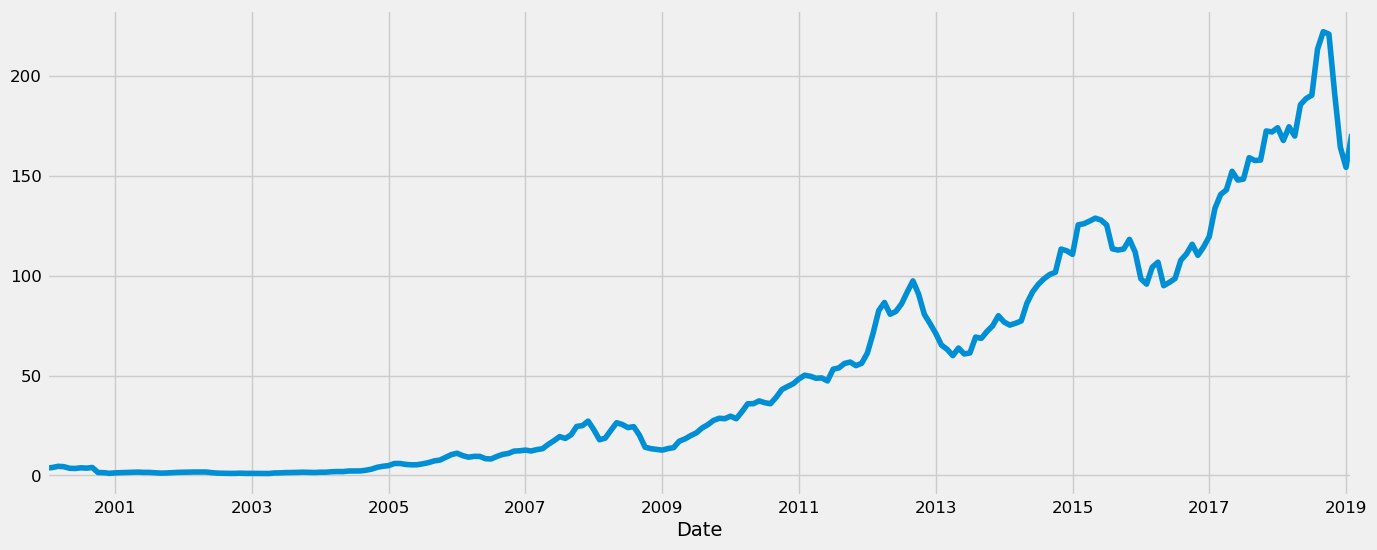

In [232]:
monthly_mean.plot(figsize=(15, 6))
plt.show()

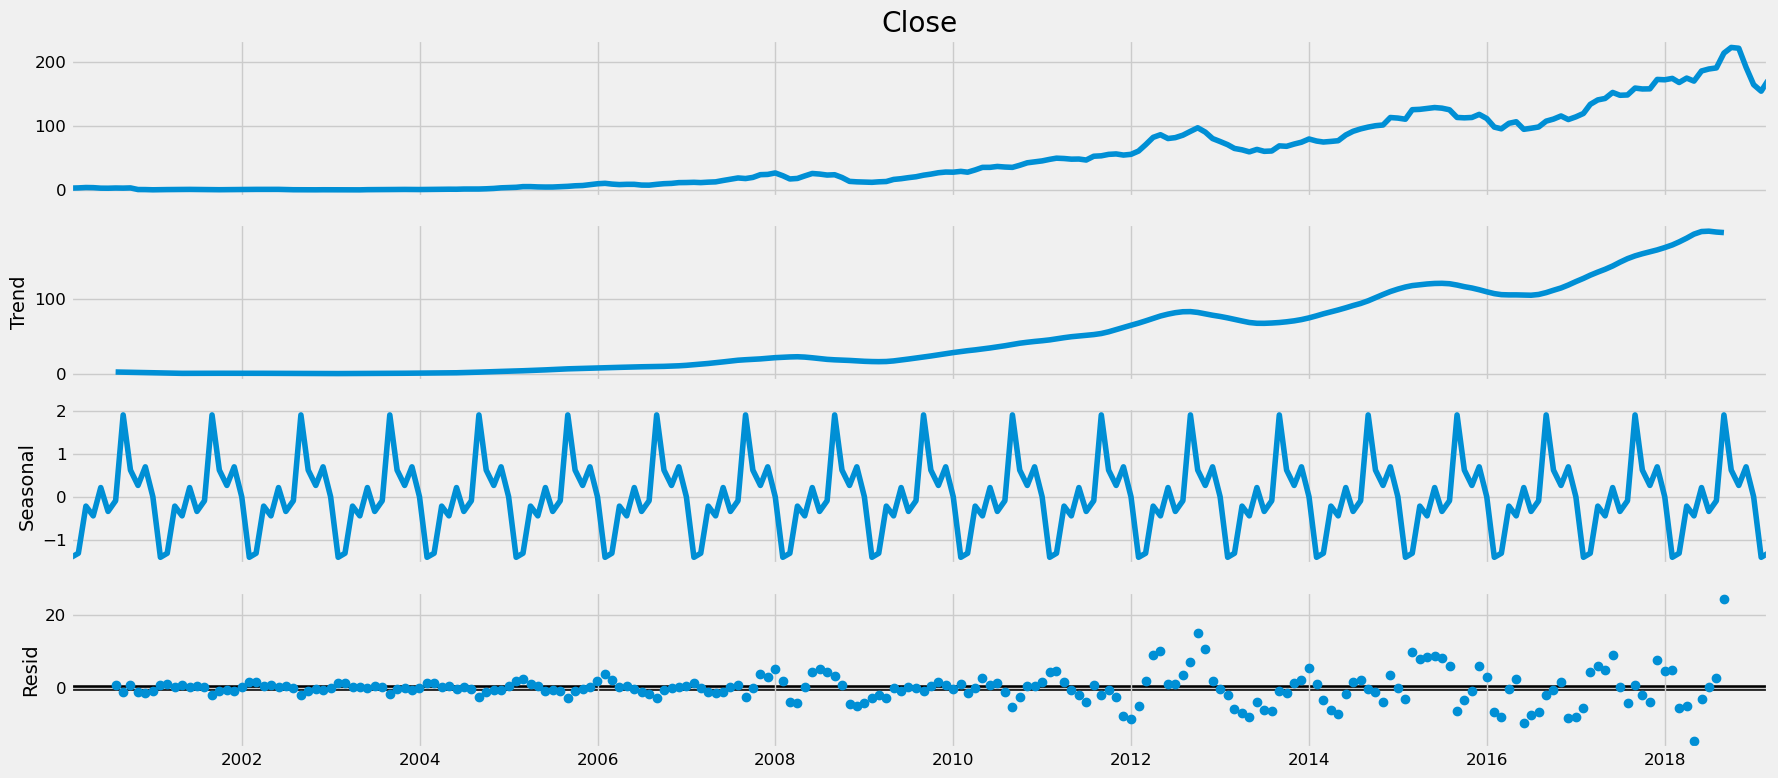

In [233]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(monthly_mean, model='additive')
fig = decomposition.plot()
plt.show()

## Indexing with time series of Amazon Stocks


In [234]:
amazon_stocks = amazon_stocks.set_index('Date')
amazon_stocks.index = pd.to_datetime(amazon_stocks.index)
monthly_mean_amazon = amazon_stocks.Close.resample('M').mean()
print(monthly_mean_amazon['2018':])

Date
2018-01-31    1309.010946
2018-02-28    1442.363146
2018-03-31    1540.367629
2018-04-30    1468.220471
2018-05-31    1594.903637
2018-06-30    1698.823812
2018-07-31    1784.649042
2018-08-31    1897.851308
2018-09-30    1966.077900
2018-10-31    1782.058265
2018-11-30    1625.483823
2018-12-31    1559.443154
2019-01-31    1640.032389
2019-02-28    1623.820013
Freq: M, Name: Close, dtype: float64


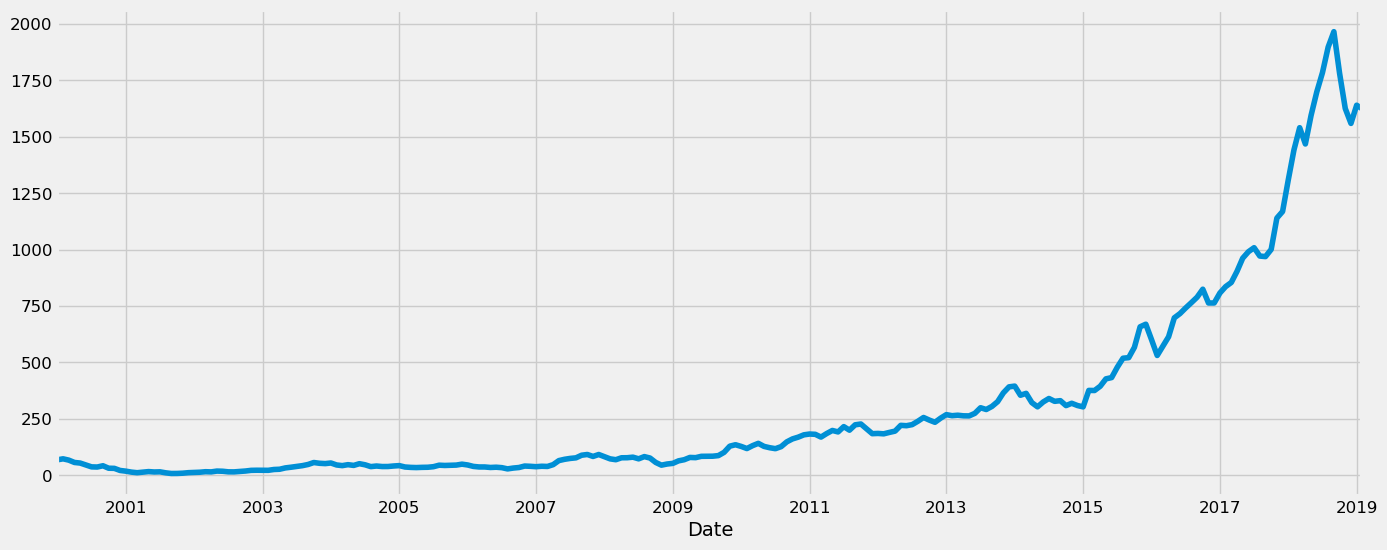

In [235]:
monthly_mean_amazon.plot(figsize=(15, 6))
plt.show()

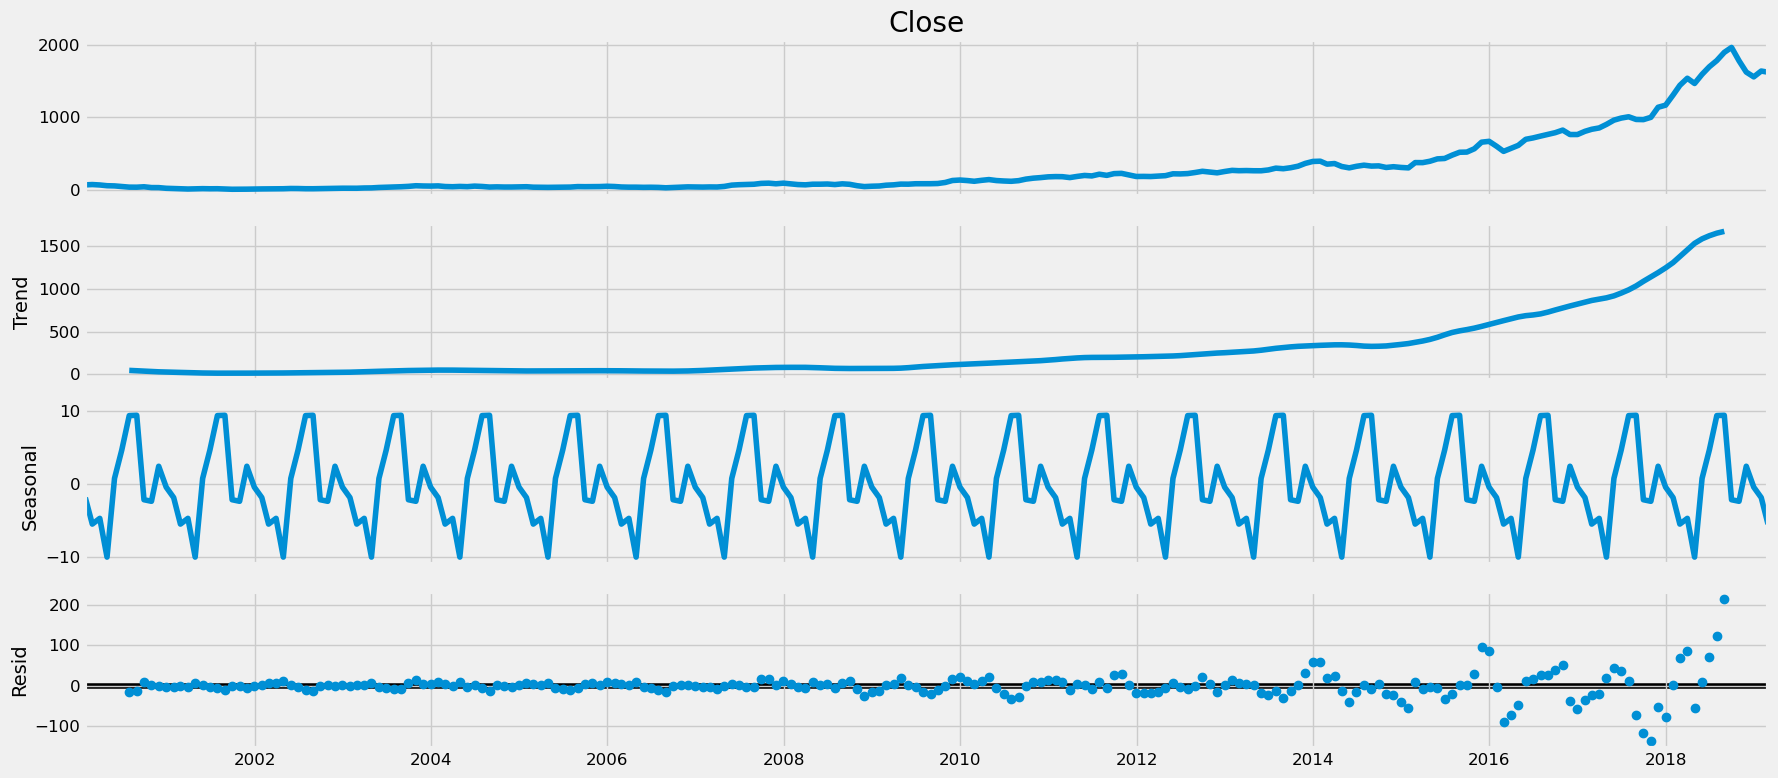

In [236]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(monthly_mean_amazon, model='additive')
fig = decomposition.plot()
plt.show()

## Time series forecasting with ARIMA

We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

Parameter Selection for the ARIMA Time Series Model. ARIMA models are denoted with the notation `ARIMA(p, d, q)`. These three parameters account for seasonality, trend, and noise in data:`

In [237]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [238]:
l_param = []
l_param_seasonal=[]
l_results_aic=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(monthly_mean,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            l_param.append(param)
            l_param_seasonal.append(param_seasonal)
            l_results_aic.append(results.aic)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2643.5019979710623
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2309.334474785123
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1951.0204253540373
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1856.0314687281093
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1890.7953591460853
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1802.9557150995204
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1863.8878931058043
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1819.3731566965625
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2329.0358209780234
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2023.3963112673484
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1696.2018573423125
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1614.327746363414
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1665.5653115234104
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1570.4018772047125
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1628.2409469193326
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1617.449565510145
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1398.2204803534112
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1334.921670958

In [239]:
l_param = []
l_param_seasonal=[]
l_results_aic=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(monthly_mean_amazon,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            l_param.append(param)
            l_param_seasonal.append(param_seasonal)
            l_results_aic.append(results.aic)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3517.1844160246774
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3170.756862178388
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2905.5162868130506
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2709.9487558840397
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2634.9447198554626
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2586.601551729186
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2636.5202271757153
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2517.962586394601
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3209.5357836568405
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2890.2821160110375
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2633.047634098942
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2469.3007722176117
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2438.7639006675145
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2368.5095846765958
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2441.562238854592
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2325.1121188172956
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2266.1614580597975
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2159.33757586568

In [240]:
minimum=l_results_aic[0]
for i in l_results_aic[1:]:
    if i < minimum: 
        minimum = i
i=l_results_aic.index(minimum)

## Apple Sarima model

In [241]:
mod = sm.tsa.statespace.SARIMAX(monthly_mean,
                                order=l_param[i],
                                seasonal_order=l_param_seasonal[i],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3166      0.042      7.485      0.000       0.234       0.399
ar.S.L12      -0.3339      0.057     -5.863      0.000      -0.446      -0.222
ma.S.L12      -0.7985      0.059    -13.560      0.000      -0.914      -0.683
sigma2        25.9474      1.292     20.077      0.000      23.414      28.480


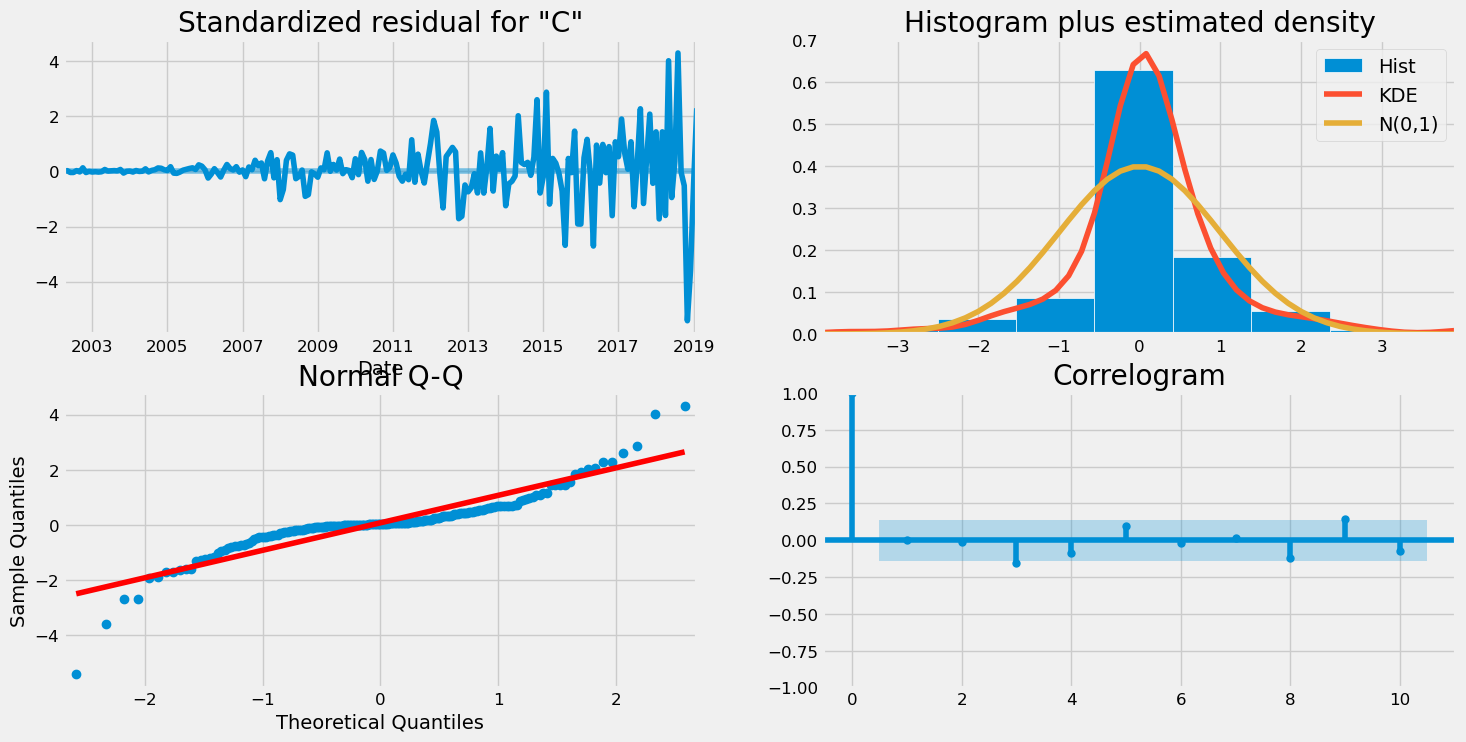

In [242]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

## Amazon Sarima model

In [243]:
mod = sm.tsa.statespace.SARIMAX(monthly_mean_amazon,
                                order=l_param[i],
                                seasonal_order=l_param_seasonal[i],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3891      0.037     10.454      0.000       0.316       0.462
ar.S.L12      -0.4845      0.065     -7.430      0.000      -0.612      -0.357
ma.S.L12      -0.5767      0.062     -9.267      0.000      -0.699      -0.455
sigma2      1095.0987     45.264     24.194      0.000    1006.384    1183.814


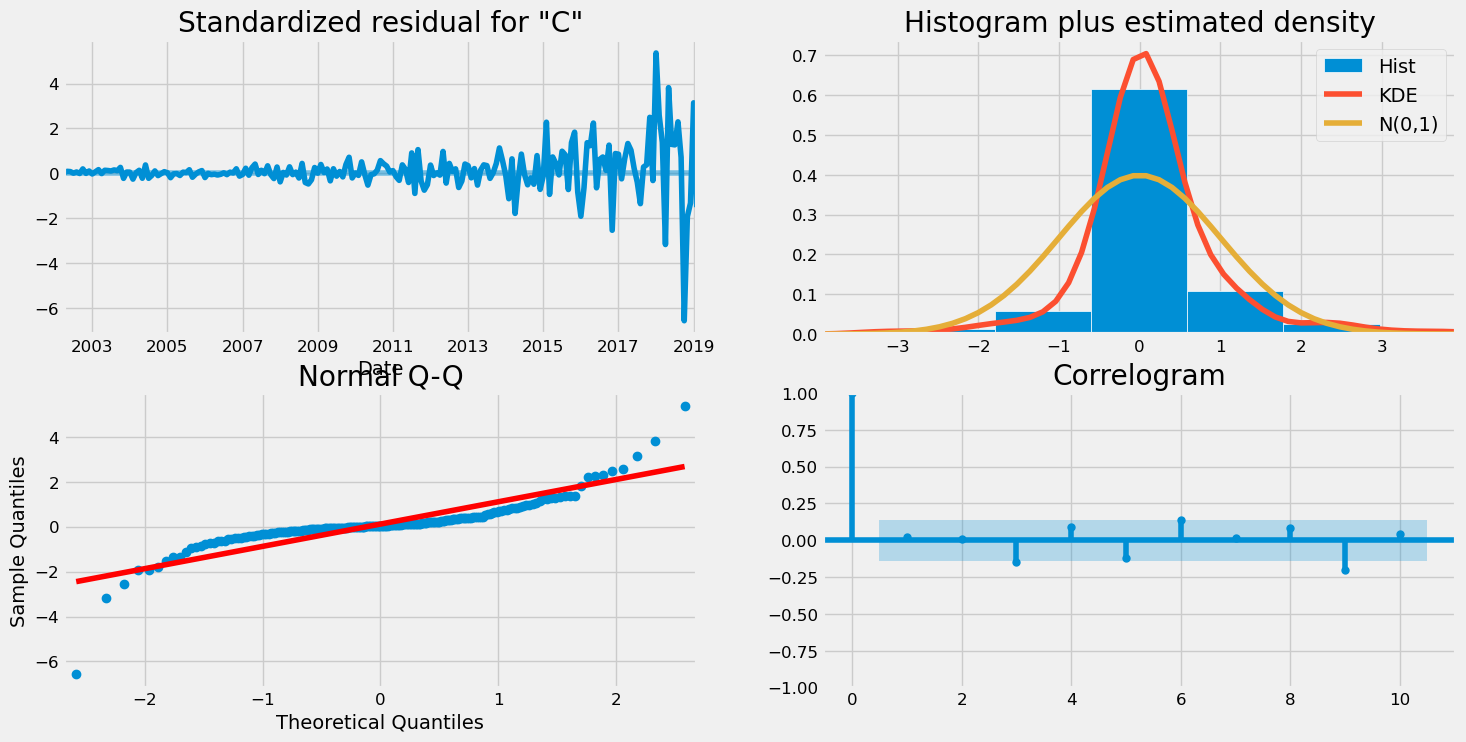

In [244]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

## Validating forecasts

To help us understand the accuracy of our forecasts, we compare predicted Close to real close price of the time series, and we set forecasts to start at `2017-12-31` to the end of the data.

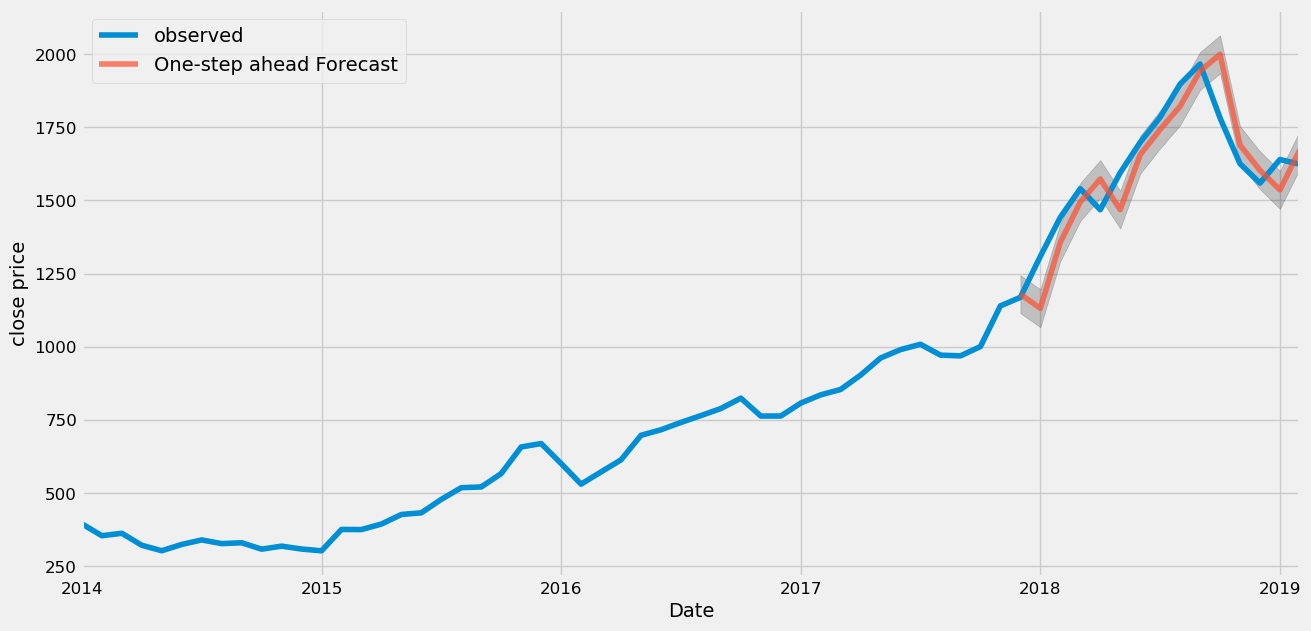

In [46]:
pred = results.get_prediction(start=pd.to_datetime('2017-12-31'), dynamic=False)
pred_ci = pred.conf_int()

ax = monthly_mean['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('close price')
plt.legend()

plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year.

In [47]:
y_forecasted = pred.predicted_mean
y_truth = monthly_mean['2017-12-31':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 9624.87


In [48]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 98.11


In statistics, the mean squared error (MSE) of an estimator measures the average of the squares of the errors — that is, the average squared difference between the estimated values and what is estimated. The MSE is a measure of the quality of an estimator—it is always non-negative, and the smaller the MSE, the closer we are to finding the line of best fit.

Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily close price in the test set within portion... of the real close price.

## Producing and visualizing forecasts

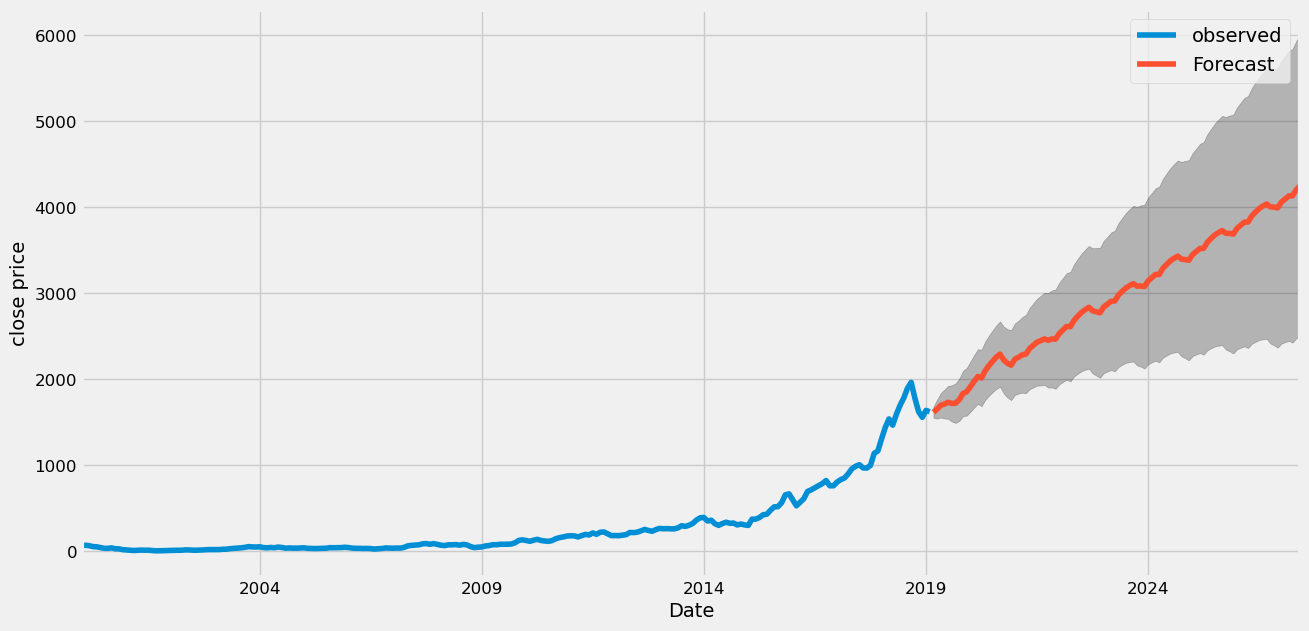

In [49]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = monthly_mean.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('close price')

plt.legend()
plt.show()